In [1]:
# import create_engine
from sqlalchemy import create_engine

In [2]:
# import pandas
import pandas as pd

In [4]:
# import psychopg2 as pg

ModuleNotFoundError: No module named 'psychopg2'

In [5]:
# engine = create_engine('postgresql://sql-challenge/EmployeeSQL/table_schemata.sql')

ImportError: dlopen(/Users/juliebaker/opt/anaconda3/lib/python3.8/site-packages/psycopg2/_psycopg.cpython-38-darwin.so, 2): Symbol not found: ____chkstk_darwin
  Referenced from: /Users/juliebaker/opt/anaconda3/lib/python3.8/site-packages/psycopg2/.dylibs/libcrypto.1.1.dylib (which was built for Mac OS X 10.15)
  Expected in: /usr/lib/libSystem.B.dylib
 in /Users/juliebaker/opt/anaconda3/lib/python3.8/site-packages/psycopg2/.dylibs/libcrypto.1.1.dylib

In [6]:
#connection = engine.connect()

NameError: name 'engine' is not defined

In [ ]:
## importing directly from csv just so I can get the remainder of the code written
## while I wait for help trying to fix the software issues I'm having above

In [10]:
import os
import csv

In [11]:
# load files
# Files to Load 
load_dept = os.path.join(os.getcwd(), "departments.csv")
load_dept_emp = os.path.join(os.getcwd(), "dept_emp.csv")
load_dept_man = os.path.join(os.getcwd(), "dept_manager.csv") # don't need this for these analyses
load_emp = os.path.join(os.getcwd(), "employees.csv") 
load_sal = os.path.join(os.getcwd(), "salaries.csv")
load_titles = os.path.join(os.getcwd(), "titles.csv")


In [12]:
# Read Files and store into Pandas data frames
dept_df = pd.read_csv(load_dept)
dept_emp_df = pd.read_csv(load_dept_emp)
dept_man_df = pd.read_csv(load_dept_man)
emp_df = pd.read_csv(load_emp)
sal_df = pd.read_csv(load_sal)
titles_df = pd.read_csv(load_titles)

In [16]:
# merge dept to dept_employees (need to do this first because there are some employees in multiple departments)
employee_depts_df = pd.merge(dept_df, dept_emp_df, on='dept_no')

In [17]:
employee_depts_df.head()

,dept_no,dept_name,emp_no
0,d001,Marketing,10017
1,d001,Marketing,10055
2,d001,Marketing,10058
3,d001,Marketing,10108
4,d001,Marketing,10140


In [18]:
len(employee_depts_df.dept_no)

331603

In [20]:
# merge previous frame to sal_df
employee_salaries_df = pd.merge(employee_depts_df, sal_df, on='emp_no')

In [21]:
employee_salaries_df.head()

,dept_no,dept_name,emp_no,salary
0,d001,Marketing,10017,71380
1,d001,Marketing,10055,80024
2,d001,Marketing,10058,52787
3,d001,Marketing,10108,40000
4,d003,Human Resources,10108,40000


In [22]:
len(employee_depts_df.dept_no)

331603

In [26]:
# merge previous to emp_df (because title code is on emp_df)
employees_notitles_df = pd.merge(employee_salaries_df, emp_df, on='emp_no')

In [28]:
# merge previous to titles_df
salary_analyses_df = pd.merge(employees_notitles_df, titles_df, left_on='emp_title_id', right_on='title_id')

In [29]:
salary_analyses_df.head()

,dept_no,dept_name,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title_id,title
0,d001,Marketing,10017,71380,s0001,7/6/1958,Cristinel,Bouloucos,F,8/3/1993,s0001,Staff
1,d001,Marketing,10055,80024,s0001,6/6/1956,Georgy,Dredge,M,4/27/1992,s0001,Staff
2,d001,Marketing,10108,40000,s0001,4/7/1952,Lunjin,Giveon,M,10/2/1986,s0001,Staff
3,d003,Human Resources,10108,40000,s0001,4/7/1952,Lunjin,Giveon,M,10/2/1986,s0001,Staff
4,d001,Marketing,10140,61352,s0001,3/11/1957,Yucel,Auria,F,3/14/1991,s0001,Staff


In [30]:
len(salary_analyses_df.dept_no)

331603

In [25]:
len(salary_titles_df.dept_no)

331603

In [32]:
# once loaded into df do the following
all_salaries_df = salary_analyses_df

In [59]:
# run basic descriptives to try to determing salary ranges to use for histogram
salary_analyses_df['salary'].describe()

count    331603.000000
mean      52972.225432
std       14299.003001
min       40000.000000
25%       40000.000000
50%       48691.000000
75%       61765.000000
max      129492.000000
Name: salary, dtype: float64

In [44]:
salary_analyses_df['emp_no'].nunique()

300024

In [50]:
#salary_analyses_df.groupby['emp_no']['salary'].mean()

In [33]:
## Looking at number of employees and unique salary values
unique_employees = all_salaries_df['emp_no'].nunique()
unique_salaries = all_salaries_df['salary'].nunique()
print(f"There are {unique_employees} \n There are {unique_salaries} values of salaries")

There are 300024 
 There are 50355 values of salaries


In [108]:
# esatblish bins for ranges
bins = [0, 40000, 44999, 49999, 54999, 59999, 64999, 69999, 74999, 79999, 89999, 130000]
salary_labels = ["$40k", "$40-45k", "$45-50k", "$50-55k", "$55-60k", "$60-65k", "$65-70k", "$70-75k", "$75-80k", "$80-90k", "90k+"]

In [109]:
# use pd.cut() to categorize employees using salary bins
salary_bin_df = all_salaries_df
salary_bin_df["salary_grp"] = pd.cut(salary_bin_df["salary"], bins, labels=salary_labels, include_lowest=False)

In [110]:
# salary demographics; counts members for each salary group & drops duplicates based on 'emp_no'
#age_counts_df2 = age_df.groupby('Age Group')['SN'].nunique()
salary_counts_df = salary_bin_df.groupby('salary_grp')['emp_no'].nunique()

In [111]:
salary_counts_df

salary_grp
$40k       95346
$40-45k    30925
$45-50k    32194
$50-55k    30871
$55-60k    27044
$60-65k    22896
$65-70k    18517
$70-75k    14213
$75-80k    10601
$80-90k    11845
90k+        5572
Name: emp_no, dtype: int64

In [ ]:
## don't think I need this code for employees
# AGE ANALYSIS NEEDS:  group count, percent of players
# I couldn't get it to add my calculated column to the df above, so I created this one & merged them. AND THEN...it was totally fine with me adding a calculated column.
age_counts_df3 = age_df.groupby('Age Group')['SN'].nunique()
age_demos_df = pd.merge(age_counts_df2, age_counts_df3, on='Age Group')
age_demos_df

In [ ]:
# purchase count
purchase_byAge_df = age_df.groupby('Age Group')['SN'].count()

In [96]:
import matplotlib as plt

<AxesSubplot:>

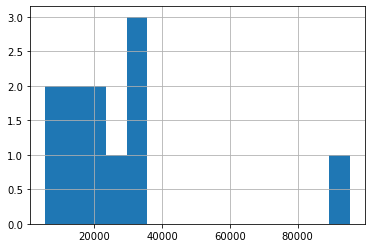

In [115]:
# create histogram to visualize most common salary ranges for employees
salary_counts_df.hist(bins=15)

In [116]:
plt.bar(salary_counts_df)

AttributeError: module 'matplotlib' has no attribute 'bar'

In [9]:
# creat bar chart of average salary by title
# be sure to filter so no duplicates for people in multiple departments